# CHEDRAUI CD

In [1]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [3]:
# Especificar columnas
relevant_columns = ['SKU','Tienda','FORMATO','Categoria','CLASE','Sem','Existencia','fiDesplazamiento','VentaPromedio','Y_Faltante']
num_columns = ['Existencia','fiDesplazamiento','VentaPromedio']
cat_columns = ['SKU','Tienda','FORMATO','Categoria','CLASE','Sem']
target = ['Y_Faltante']

In [4]:
dtype = {'SKU':'object','FORMATO':'object','REGION':'object','Tienda':'object','Categoria':'object','Proveedor':'object','CLASE':'object','SCLASE':'object','Mes':'object','DiaSem':'object','Sem':'object','Existencia':'float','fiDesplazamiento':'float',
\
'VentaPromedio':'float','Y_Faltante':'int'}

In [5]:
# Abrir el archivo
file = '8semanas.csv'
data = pd.read_csv(file, header=0,low_memory=False, usecols=relevant_columns,dtype=dtype)
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 3304660  columns: 10


In [6]:
# Abrir el archivo
file = 'datos_entrenamiento.csv'
data_2 = pd.read_csv(file, header=0,low_memory=False, encoding='latin-1',usecols=relevant_columns,dtype=dtype)
print('rows:', data_2.shape[0], ' columns:', data_2.shape[1])

rows: 5094322  columns: 10


In [7]:
data = pd.concat([data,data_2],join='inner')
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 8398982  columns: 10


In [8]:
# Abrir el archivo que contiene el conjunto de validación 
file_val = '1semana.csv'
data_val = pd.read_csv(file_val, header=0,low_memory=False, usecols=relevant_columns,encoding='latin-1',dtype=dtype)
print('rows:', data_val.shape[0], ' columns:', data_val.shape[1])

rows: 2608114  columns: 10


In [9]:
data = data.dropna()
data_val = data_val.dropna()

In [10]:
def segmentador_formato(frame,cadena):
    arreglo = frame[frame['FORMATO']==cadena]
    return arreglo 

In [11]:
chedraui_cd = segmentador_formato(data,'CHEDRAUI CD')
chedraui_cd_val = segmentador_formato(data_val,'CHEDRAUI CD')

yes %: 50.33705612681122- no %: 49.66294387318877


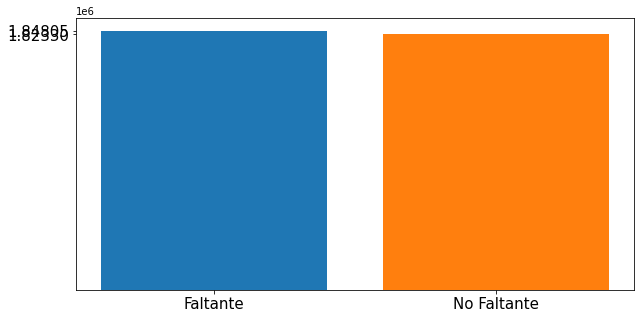

In [12]:
# Revisamos la proporción de datos
target = chedraui_cd['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
#Balanceamos a 50% - 50% nuestro conjunto de datos.
data_yes = chedraui_cd[chedraui_cd["Y_Faltante"] == 1]
data_no = chedraui_cd[chedraui_cd["Y_Faltante"] == 0]
over_sampling = data_yes.sample(no, replace=True, \
random_state = 0)
balanced_data = pd.concat([data_no, over_sampling], \
axis=0)
chedraui_cd = balanced_data.reset_index(drop=True)

yes %: 50.0- no %: 50.0


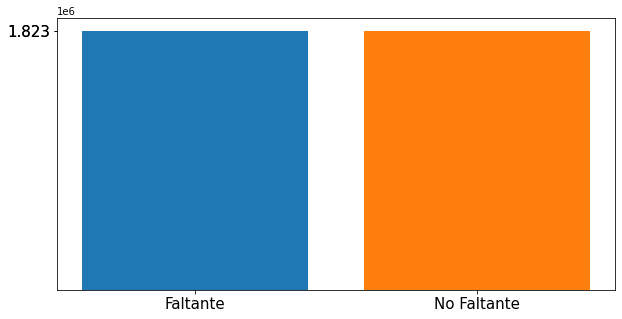

In [14]:
# Verificamos que el conjunto de datos está perfectamente balanceado
# Revisamos la proporción de datos
target = chedraui_cd['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
chedraui_cd = chedraui_cd.drop('FORMATO',axis=1)
chedraui_cd_val = chedraui_cd_val.drop('FORMATO',axis=1)

In [16]:
X_train = chedraui_cd.drop('Y_Faltante',axis=1)
y_train = chedraui_cd.Y_Faltante
X_val = chedraui_cd_val.drop('Y_Faltante',axis=1)
y_val = chedraui_cd_val.Y_Faltante

In [17]:
indices_categoricos = np.where(X_train.dtypes != float)[0]
indices_categoricos

array([0, 1, 2, 3, 4])

In [18]:
num_ind = np.where(X_train.dtypes != object)[0]
num_ind

array([5, 6, 7])

In [19]:
model = CatBoostClassifier(
    l2_leaf_reg=int(1.0),
    custom_loss=[metrics.Accuracy()],
    random_seed=0,
    logging_level='Verbose', # Write 'Silent' instead of 'verbose'
    task_type='GPU',
    #iterations=190
)

In [20]:
model.fit(
    X_train, y_train,
    cat_features=indices_categoricos,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6465016	test: 0.6628444	best: 0.6628444 (0)	total: 354ms	remaining: 5m 54s
1:	learn: 0.6021024	test: 0.6301308	best: 0.6301308 (1)	total: 694ms	remaining: 5m 46s
2:	learn: 0.5642725	test: 0.6020192	best: 0.6020192 (2)	total: 1.07s	remaining: 5m 55s
3:	learn: 0.5312606	test: 0.5784023	best: 0.5784023 (3)	total: 1.36s	remaining: 5m 39s
4:	learn: 0.5001241	test: 0.5540754	best: 0.5540754 (4)	total: 1.79s	remaining: 5m 55s
5:	learn: 0.4727680	test: 0.5316493	best: 0.5316493 (5)	total: 2.17s	remaining: 5m 59s
6:	learn: 0.4484185	test: 0.5093984	best: 0.5093984 (6)	total: 2.46s	remaining: 5m 49s
7:	learn: 0.4265504	test: 0.4906291	best: 0.4906291 (7)	total: 2.91s	remaining: 6m
8:	learn: 0.4069113	test: 0.4715593	best: 0.4715593 (8)	total: 3.25s	remaining: 5m 57s
9:	learn: 0.3900907	test: 0.4542811	best: 0.4542811 (9)	total: 3.62s	remaining: 5m 58s
10:	learn: 0.3748998	test: 0.4394313	best: 0.4394313 (10)	total: 4.04s	remaining: 6m 3s
11:	learn: 0.3611233	test: 0.4248706	best: 0.4

In [21]:
print('Ago Model')
print('Tree count: {}'.format(model.tree_count_))
print('Accuracy: {:.5}'.format(accuracy_score(y_val, model.predict(X_val))))
print('True Positive Rate: {:.5}'.format(recall_score(y_val, model.predict(X_val))))
print('Precision: {:.5}'.format(precision_score(y_val, model.predict(X_val))))
print('Balanced Accuracy: {:.5}'.format(balanced_accuracy_score(y_val, model.predict(X_val))))
print('F1 Score: {:.5}'.format(f1_score(y_val, model.predict(X_val))))

Ago Model
Tree count: 408
Accuracy: 0.97705
True Positive Rate: 0.88545
Precision: 0.92735
Balanced Accuracy: 0.93778
F1 Score: 0.90592


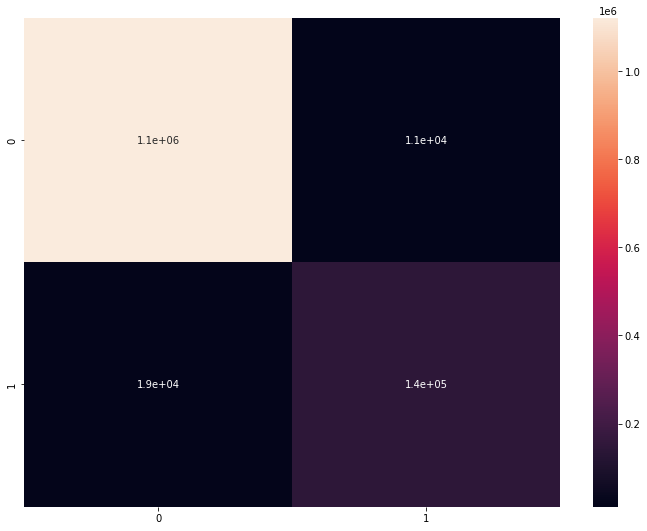

In [22]:
y_pred = model.predict(X_val)
# Dibujamos también la matriz de confusión para nuestro modelo
mat = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [23]:
y_pred = model.predict(X_val)
prediction_probs = model.predict_proba(X_val)

accuracy = accuracy_score(y_val,y_pred)
recall = recall_score(y_val,y_pred,average='binary',pos_label=1)
precision = precision_score(y_val,y_pred,average='binary',pos_label=0)
balanced_accuracy = balanced_accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9770467356155758
True Positive Rate 0.8854485905508398
Precision 0.983769833750886
Balanced accuracy 0.9377784942622458
f1 score 0.9059150682848962


In [24]:
# Calculamos las entradas de la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
tn,fp,fn,tp

(1121474, 11204, 18502, 143015)

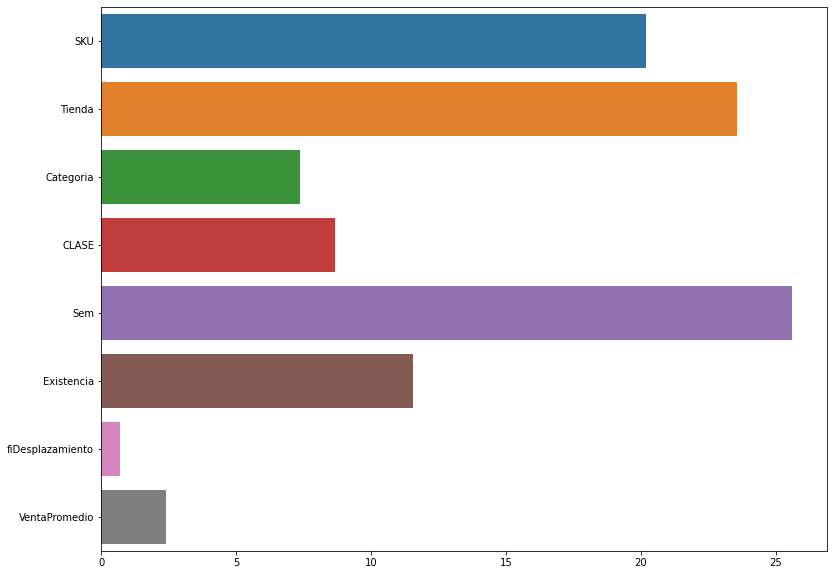

In [25]:
# Graficar la importancia de las variables
fi2 = pd.Series(model.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize = (13,10))
sns.barplot(x=fi2.values, y=fi2.index, ax=ax)
plt.show()

In [27]:
copia_general = X_val.copy()
copia_general['Y_Faltante'] = y_val
copia_general['Predicción_Ago'] = model.predict(X_val)
copia_general.to_csv('Chedrauicd_vs_1semana.csv',index=True)

: 

## Vamos a tratar de implementar un corrector

In [165]:
nuevos_datos = chedraui_cd_val.copy()
#nuevos_datos['Predicción_Ago'] = model.predict(nuevos_datos.drop('Y_Faltante',axis=1))

In [166]:
nuevos_datos['Predicción_Ago'] = model.predict(nuevos_datos.drop('Y_Faltante',axis=1))

In [167]:
nuevos_datos[['0','1']] = model.predict_proba(nuevos_datos.drop(['Y_Faltante','Predicción_Ago'],axis=1))

In [168]:
nuevos_datos

,SKU,Tienda,Categoria,CLASE,Sem,Existencia,fiDesplazamiento,VentaPromedio,Y_Faltante,Predicción_Ago,0,1
49190,3009255,CHEDRAUI AGUASCALIENTES ASUNCION,DULCES Y CHOCOLATES,DULCES Y CHOCOLATES,22,70.0,94.0,1739.94,0,0,0.999335,0.000665
49191,3596913,CHEDRAUI AGUASCALIENTES ASUNCION,SALSAS,SALSAS,21,44.0,59.0,944.00,0,0,0.972057,0.027943
49192,3605902,CHEDRAUI AGUASCALIENTES ASUNCION,LOZA,LOZA,22,34.0,9.0,503.46,1,1,0.000012,0.999988
49193,3349522,CHEDRAUI AGUASCALIENTES ASUNCION,FÃRMULAS INFANTILES,FÃRMULAS INFANTILES,22,6.0,0.0,0.00,0,0,0.928290,0.071710
49194,3019707,CHEDRAUI AGUASCALIENTES ASUNCION,LECHE POLVO,LECHE POLVO,22,15.0,9.0,1368.00,0,0,0.770763,0.229237
...,...,...,...,...,...,...,...,...,...,...,...,...
2573515,3229535,CHEDRAUI POZA RICA PETROMEX,TINTES DAMA,TINTES DAMA,23,14.0,14.0,420.98,0,0,0.852211,0.147789
2573516,3457054,CHEDRAUI POZA RICA PETROMEX,DESODORANTES DAMA,DESODORANTES DAMA,23,3.0,9.0,450.00,0,0,0.753643,0.246357
2573517,3739192,CHEDRAUI POZA RICA PETROMEX,DULCES Y CHOCOLATES,DULCES Y CHOCOLATES,23,0.0,0.0,0.00,1,1,0.000171,0.999829
2573518,3042544,CHEDRAUI POZA RICA PETROMEX,MAYONESAS,MAYONESAS,23,54.0,36.0,5760.00,0,0,0.949453,0.050547


In [169]:
# 0 va a indicar acuerdo y 1 indica desacuerdo
faltante_real = nuevos_datos['Y_Faltante']
faltante_predicho = nuevos_datos['Predicción_Ago']
verdaderos_positivos = (faltante_real + faltante_predicho) % 2
nuevos_datos['Acuerdo'] = verdaderos_positivos 

In [170]:
# Aquí reportamos el numero de acuerdos y desacuerdos
verdaderos_positivos.value_counts()

0    1264373
1      29822
dtype: int64

yes %: 2.3042895390570974- no %: 97.69571046094289


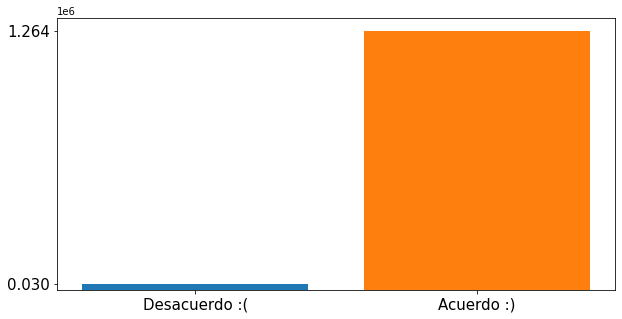

In [171]:
# Revisamos (de nuevo) la proporción de datos
target = verdaderos_positivos
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Desacuerdo :(", yes)
plt.bar("Acuerdo :)", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [172]:
buenas = nuevos_datos[nuevos_datos['Acuerdo']==0]
malas = nuevos_datos[nuevos_datos['Acuerdo']==1]

In [173]:
len(buenas)

1264373

In [174]:
len(malas)

29822

In [175]:
pieza = buenas[0:len(malas)]
len(pieza)

29822

In [176]:
# El argumento de extrae vá a ser "y" donde  x = 100% - y & "y" es el porcentaje (del total) que quieres extraer
frame_final = pd.concat([malas,pieza],axis=0)

### Aquí la idea es construir una muestra que sea 50 vs 50 tanto en acuerdo
### Posiblemente sea interesante también hacer una prueba con un modelo que tenga 50/50 tanto en acuerdo como en faltante contra no faltante 

yes %: 50.0- no %: 50.0


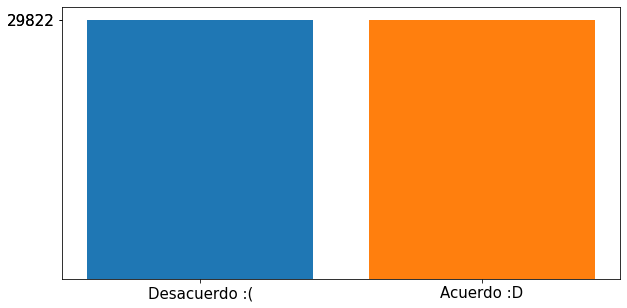

In [177]:
# Revisamos la proporción de datos
target = frame_final['Acuerdo']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Desacuerdo :(", yes)
plt.bar("Acuerdo :D", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [194]:
frame_final_features = frame_final[['Predicción_Ago','0','1']]
frame_final_target = frame_final.Y_Faltante

## Usamos un encaje de árboles altas dimensiones como corrector 

In [195]:
# Se construyen los conjuntos de entrenamiento y prueba sobre los que se aplicarán algoritmos de machine learning
X1_train, X1_val, y1_train, y1_val = train_test_split(frame_final_features, frame_final_target, test_size=0.2, random_state=0)
print('Entrenamiento:', X1_train.shape[0], ' Prueba:', X1_val.shape[0])

Entrenamiento: 47715  Prueba: 11929


In [196]:
from sklearn.ensemble import RandomTreesEmbedding
random_tree_embedding = RandomTreesEmbedding(random_state=0)

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

gb_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=1000))
gb_model.fit(X1_train, y1_train)

Pipeline(steps=[('randomtreesembedding', RandomTreesEmbedding(random_state=0)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

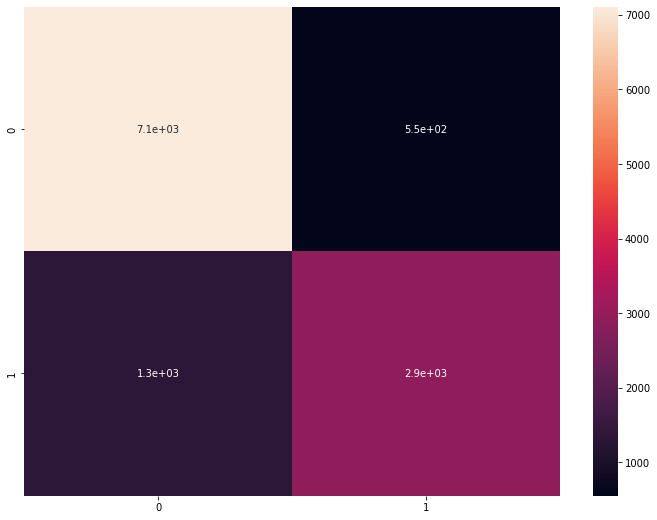

In [200]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = gb_model.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [201]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.840891944002012
True Positive Rate 0.6846424384525205
Precision 0.8407716671465592
Balanced accuracy 0.8062434530467195
f1 score 0.7547169811320753


## Usamos un sistema de recomendaciones

In [205]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)

gb.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=0)

In [206]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gb}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
gbdt_model.fit(X1_train, y1_train)

/home/rlopez/anaconda3/envs/Algoritmo/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x7f2a1d924160>,
                                     kw_args={'model': GradientBoostingClassifier(random_state=0)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

/home/rlopez/anaconda3/envs/Algoritmo/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


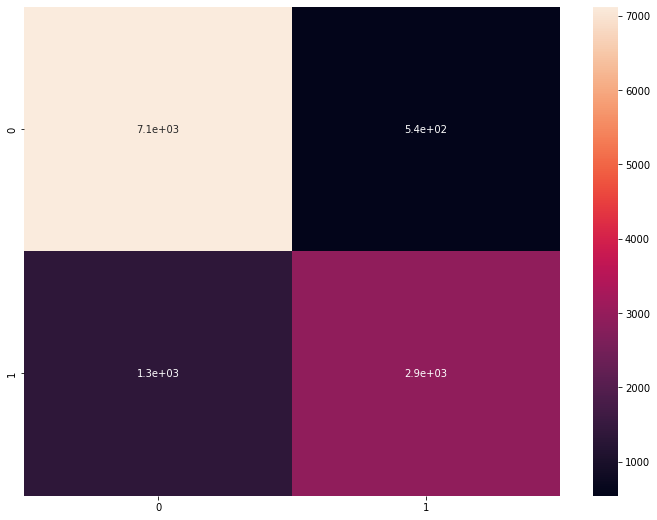

In [207]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = gbdt_model.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [208]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.842317042501467
True Positive Rate 0.6858147713950762
Precision 0.8439122908251587
Balanced accuracy 0.807612500520085
f1 score 0.7566938300349243


## Usamos el clasificador AdaBoost 

In [238]:
from sklearn.ensemble import AdaBoostClassifier

In [239]:
from sklearn.ensemble import RandomForestClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X1_train, y1_train)
ada.predict(X1_val)
acc_train = ada.score(X1_train,y1_train)
acc_test = ada.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.8358, Presición validación: 0.8352


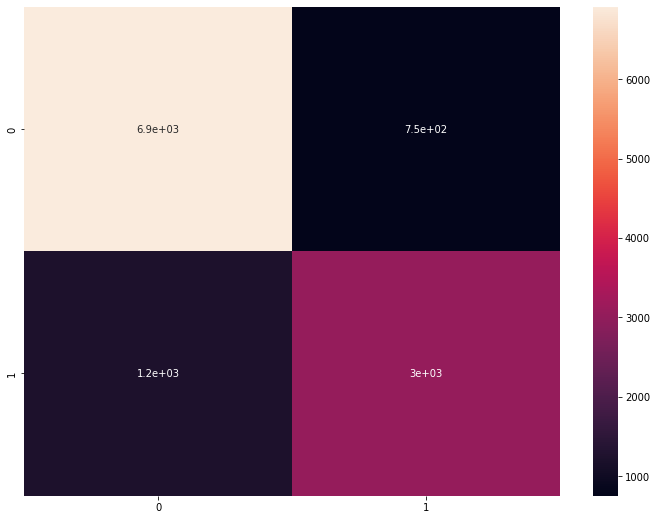

In [240]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = ada.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [241]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8351915500041914
True Positive Rate 0.7146541617819461
Precision 0.8027390044772189
Balanced accuracy 0.8084622583440002
f1 score 0.756139915653684


: 

## Vamos a tratar con un random forest

In [209]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X1_train, y1_train)
rfc.predict(X1_val)
acc_train = rfc.score(X1_train,y1_train)
acc_test = rfc.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9982, Presición validación: 0.974


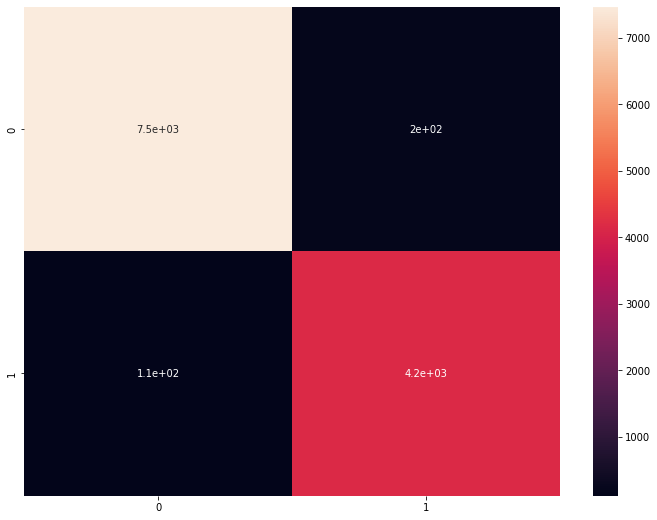

In [210]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = rfc.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [211]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9740129097158186
True Positive Rate 0.9737397420867526
Precision 0.9544932199494369
Balanced accuracy 0.9739523345089296
f1 score 0.964020427112349


## Vanilla LightGBM classifier

In [214]:
#from sklearn.ensemble import GradientBoostClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X1_train, y1_train)
lgbm.predict(X1_val)
acc_train = lgbm.score(X1_train,y1_train)
acc_test = lgbm.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.8405, Presición validación: 0.8377


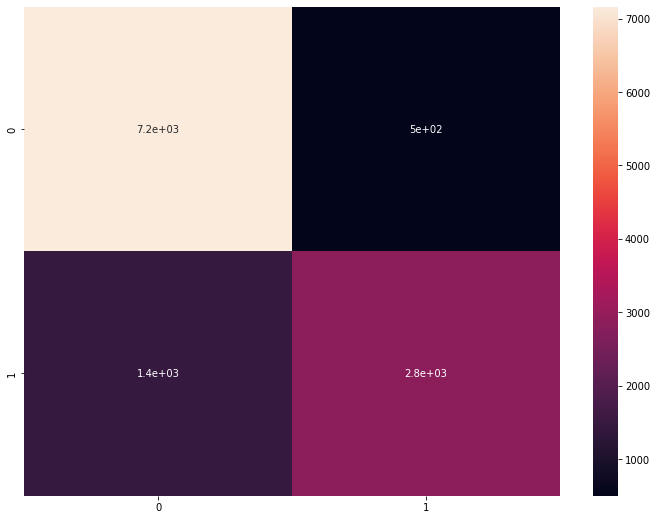

In [215]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lgbm.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [216]:
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(7165, 499, 1437, 2828)

In [217]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8377064297091122
True Positive Rate 0.6630715123094959
Precision 0.850015028554253
Balanced accuracy 0.7989809544846018
f1 score 0.7449947312961012


## Local Cascade Ensemble

In [221]:
# Entrenamos un LCE con los parametros por defecto
from lce import LCEClassifier
lce = LCEClassifier(n_jobs=-1, random_state=123)
lce.fit(X1_train, y1_train)
lce.predict(X1_val)
acc_train = lce.score(X1_train,y1_train)
acc_test = lce.score(X1_val,y1_val)
print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9844, Presición validación: 0.9437


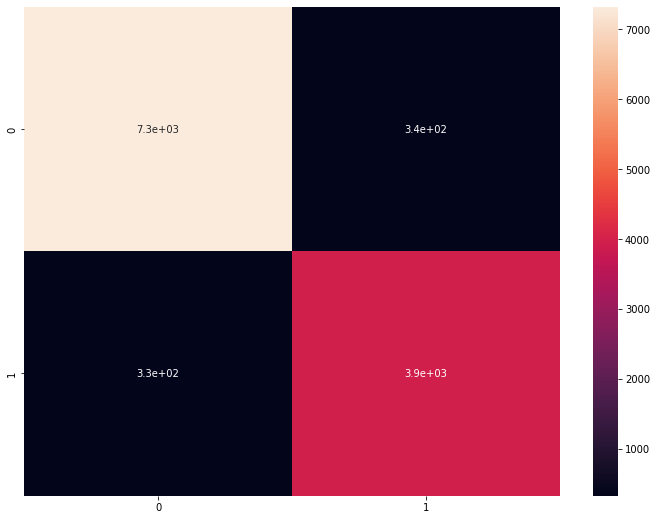

In [222]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lce.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [223]:
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(7320, 344, 328, 3937)

In [224]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9436666946097745
True Positive Rate 0.923094958968347
Precision 0.9196449427703808
Balanced accuracy 0.93910489075766
f1 score 0.9213667212731101


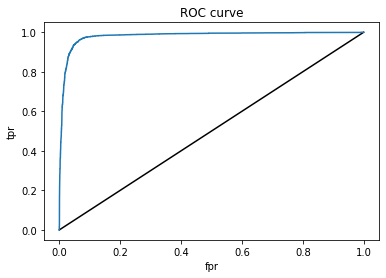

In [225]:
from sklearn.metrics import roc_curve
y_pred_proba = lce.predict_proba(X1_val)[:,1]
fpr, tpr, thresholds = roc_curve(y1_val, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Usamos un XGBClassifier

In [233]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [234]:
from sklearn.ensemble import RandomForestClassifier
xgb = RandomForestClassifier(random_state=0)
xgb.fit(X1_train, y1_train)
xgb.predict(X1_val)
acc_train = xgb.score(X1_train,y1_train)
acc_test = xgb.score(X1_val,y1_val)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9982, Presición validación: 0.974


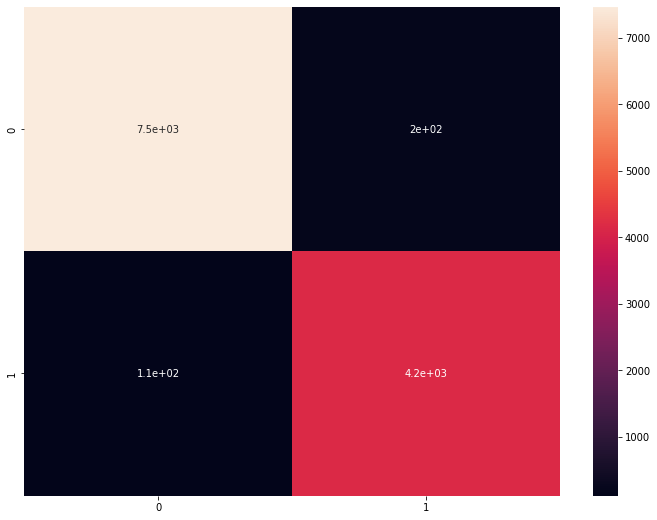

In [235]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = xgb.predict(X1_val)
mat = confusion_matrix(y1_val, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [236]:
# Calculamos las entradas de la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y1_val, y_pred).ravel()
tn,fp,fn,tp

(7466, 198, 112, 4153)

In [237]:
accuracy = accuracy_score(y1_val,y_pred)
recall = recall_score(y1_val,y_pred)
precision = precision_score(y1_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_val,y_pred)
f1 = f1_score(y1_val,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.9740129097158186
True Positive Rate 0.9737397420867526
Precision 0.9544932199494369
Balanced accuracy 0.9739523345089296
f1 score 0.964020427112349


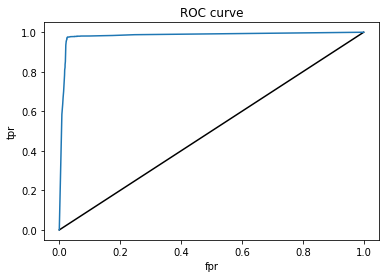

In [232]:
from sklearn.metrics import roc_curve
y_pred_proba = xgb.predict_proba(X1_val)[:,1]
fpr, tpr, thresholds = roc_curve(y1_val, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

### Usamos una red neuronal como corrector

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [179]:
class Red_Ago(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 10)
        self.hidden_5 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

In [187]:
frame_final_features = frame_final[['Predicción_Ago','0','1']]
frame_final_target = frame_final.Y_Faltante

In [188]:
# Aislamos las variables numéricas y realizamos un min-max scaling sobre ellas
#categorical = frame_final_train.drop(columns=['Existencia','fiDesplazamiento','VentaPromedio'])
#numerical = frame_final_train[['Existencia','fiDesplazamiento','VentaPromedio','0','1']]
#numerical_scaled = (numerical - numerical.min())/(numerical.max() - numerical.min())

In [189]:
#frame_final_train = pd.concat([categorical,numerical_scaled], axis=1)

In [190]:
# Se construyen los conjuntos de entrenamiento y prueba sobre los que se aplicarán algoritmos de machine learning
X1_train, X1_val, y1_train, y1_val = train_test_split(frame_final_features, frame_final_target, test_size=0.2, random_state=0)
print('Entrenamiento:', X1_train.shape[0], ' Prueba:', X1_val.shape[0])

Entrenamiento: 47715  Prueba: 11929


In [191]:
X_test_torch = torch.tensor(X1_val.values).float()
y_test_torch = torch.tensor(y1_val.values)

In [192]:
model1 = Red_Ago(X1_train.shape[1])
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model1.parameters(), lr=0.001)

epochs = 200
batch_size = 1000


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X1_train, y1_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model1(X_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model1(X_test_torch)
        dev_loss = criterion(log_dev, y_test_torch)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%20 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.6f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.6f}.. ".format(dev_loss),
              "Training Accuracy: {:.6f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.6f}".format(acc))

Epoch: 1/200..  Training Loss: 0.472691..  Validation Loss: 0.404525..  Training Accuracy: 0.830457..  Validation Accuracy: 0.835192
Epoch: 20/200..  Training Loss: 0.389688..  Validation Loss: 0.389090..  Training Accuracy: 0.837429..  Validation Accuracy: 0.835946
Epoch: 40/200..  Training Loss: 0.389653..  Validation Loss: 0.388776..  Training Accuracy: 0.836811..  Validation Accuracy: 0.834689
Epoch: 60/200..  Training Loss: 0.388848..  Validation Loss: 0.388734..  Training Accuracy: 0.837179..  Validation Accuracy: 0.835443
Epoch: 80/200..  Training Loss: 0.389394..  Validation Loss: 0.388819..  Training Accuracy: 0.836271..  Validation Accuracy: 0.835946
Epoch: 100/200..  Training Loss: 0.388343..  Validation Loss: 0.387747..  Training Accuracy: 0.837005..  Validation Accuracy: 0.835024
Epoch: 120/200..  Training Loss: 0.388349..  Validation Loss: 0.387773..  Training Accuracy: 0.836992..  Validation Accuracy: 0.835527
Epoch: 140/200..  Training Loss: 0.388422..  Validation Loss:

In [193]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model1(X_test_torch)
dev_loss = criterion(log_dev, y_test_torch)
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_test_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8347724033867047
True Positive Rate 0.6656506447831184
Precision 0.8389479905437353
Balanced accuracy 0.797269476880077
f1 score 0.7423192574192705
